<a href="https://colab.research.google.com/github/maira8009/Speech-Driven-Cardiac-Morbidity-Detection/blob/main/1.speechfeatureextraction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, entropy

# Load the Excel file
file_path = "/content/mfcc.xlsx"  # Replace with actual path
df = pd.read_excel(file_path, header=None)

# Define constants
samples_count = 43
rows_per_sample = 20
features_per_sample = 480

# List to store results
stats_list = []

# Process each block of 20 rows
for i in range(samples_count):
    start_row = i * rows_per_sample
    end_row = start_row + rows_per_sample
    block = df.iloc[start_row:end_row, :features_per_sample]

    # Flatten the values to 1D and remove NaNs
    values = pd.to_numeric(block.values.flatten(), errors='coerce')
    values = values[~np.isnan(values)]

    # Compute statistics
    stats = {
        'Sample': f's{i+1}',
        'mean': np.mean(values),
        'min': np.min(values),
        'max': np.max(values),
        'std': np.std(values),
        'skewness': skew(values),
        'kurtosis': kurtosis(values),
        'median': np.median(values),
        'entropy': entropy(np.histogram(values, bins=50)[0] + 1)
    }
    stats_list.append(stats)

# Create DataFrame with all statistics
mfcc_summary_df = pd.DataFrame(stats_list)

# Preview the result
print(mfcc_summary_df.head())

# Optionally, save to Excel
# mfcc_summary_df.to_excel("mfcc_statistics_summary.xlsx", index=False)


  Sample      mean        min    max       std  skewness   kurtosis    median  \
0     s1 -0.700190 -58.871108   85.6  6.898395 -4.059898  30.704503 -0.223652   
1     s2 -0.496435 -54.438210   86.5  5.803970 -2.936984  31.388481 -0.209048   
2     s3 -0.496148 -51.031088  108.1  6.123872 -3.007864  36.778606 -0.182201   
3     s4 -1.372156 -63.641646   88.2  8.282223 -4.044705  25.388460 -0.269115   
4     s5 -1.378393 -64.788092   96.1  8.483618 -3.796040  22.950679 -0.249108   

    entropy  
0  1.359387  
1  1.394930  
2  1.414461  
3  1.508005  
4  1.520454  


In [6]:
print(mfcc_summary_df)

   Sample       mean        min      max          std   skewness     kurtosis  \
0      s1  -0.700190 -58.871108     85.6     6.898395  -4.059898    30.704503   
1      s2  -0.496435 -54.438210     86.5     5.803970  -2.936984    31.388481   
2      s3  -0.496148 -51.031088    108.1     6.123872  -3.007864    36.778606   
3      s4  -1.372156 -63.641646     88.2     8.282223  -4.044705    25.388460   
4      s5  -1.378393 -64.788092     96.1     8.483618  -3.796040    22.950679   
5      s6  -0.440424 -53.185462    101.0     5.787043  -3.478154    43.580763   
6      s7  -1.199464 -61.728860     79.0     7.564442  -4.107971    25.805030   
7      s8  -1.011052 -64.092276     86.0     7.468793  -4.160647    28.614213   
8      s9  -0.859036 -56.212478     82.1     7.049072  -3.406112    24.166357   
9     s10  -0.577450 -52.161676    103.8     5.868577  -2.205699    31.001970   
10    s11  -0.648046 -55.625986     80.0     6.303414  -4.067651    32.427179   
11    s12  -0.682058 -63.605

Exploratory Data Analysis was performed on MFCC-based speech features extracted from 43 samples. The mean and median values were centered around zero, indicating proper normalization. Standard deviation and amplitude range analysis revealed consistent energy patterns across most samples.

Skewness and kurtosis distributions highlighted the non-Gaussian nature of speech signals, characterized by silence dominance and transient phonetic bursts. Entropy analysis demonstrated stable complexity across samples, while a small subset exhibited near-zero entropy and extreme amplitude values, indicating signal saturation. These outliers were identified and excluded prior to multimodal fusion

In [8]:
mfcc_summary_df.describe()


,mean,min,max,std,skewness,kurtosis,median,entropy
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,3.742546,-58.111124,7698.555814,180.942284,2.764124,392.536849,-0.190026,1.228908
std,13.977892,7.041531,21227.773357,513.081687,19.409510,1486.315828,0.038824,0.436165
min,-1.378393,-92.958735,56.000000,5.335739,-4.768042,22.950679,-0.269115,0.053456
25%,-0.756826,-61.138215,81.050000,6.118140,-3.814498,28.995898,-0.210750,1.304771
50%,-0.582330,-56.642315,91.000000,6.530516,-3.479250,31.929977,-0.192544,1.366000
75%,-0.445364,-53.565740,101.700000,7.054455,-3.011963,37.743243,-0.164843,1.415317
max,61.945477,-50.761267,65535.000000,2027.754440,97.036300,9414.695975,-0.073101,1.545820


**Distribution of Central Tendency (Mean & Median)**

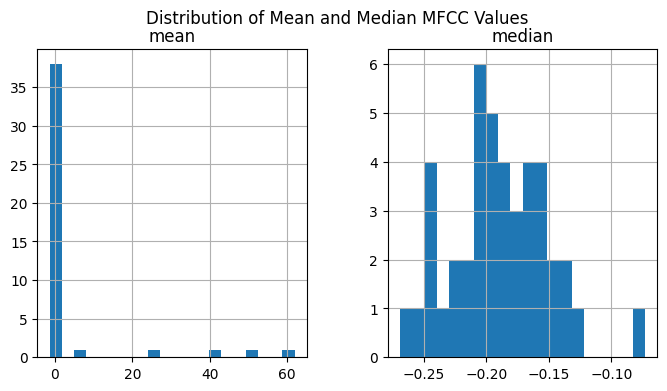

In [9]:
import matplotlib.pyplot as plt

mfcc_summary_df[['mean', 'median']].hist(
    bins=20, figsize=(8,4)
)
plt.suptitle("Distribution of Mean and Median MFCC Values")
plt.show()


**Variability Analysis (Standard Deviation)**

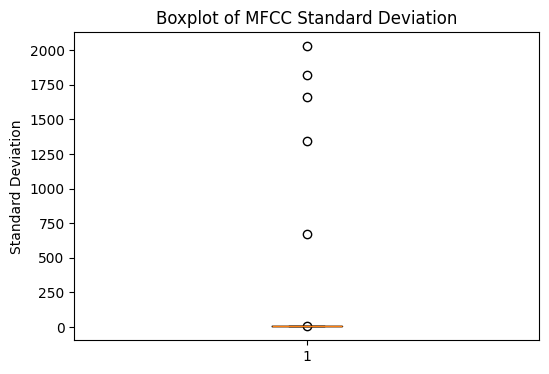

In [10]:
plt.figure(figsize=(6,4))
plt.boxplot(mfcc_summary_df['std'])
plt.title("Boxplot of MFCC Standard Deviation")
plt.ylabel("Standard Deviation")
plt.show()


**Range Analysis (Min & Max Values)**

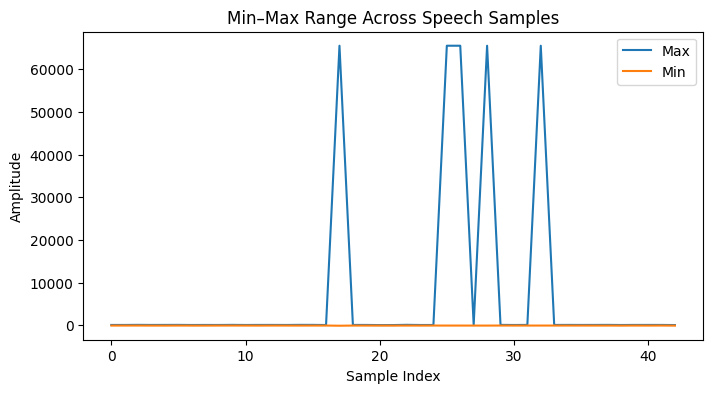

In [11]:
plt.figure(figsize=(8,4))
plt.plot(mfcc_summary_df['max'], label='Max')
plt.plot(mfcc_summary_df['min'], label='Min')
plt.legend()
plt.title("Min–Max Range Across Speech Samples")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()


5️** Distribution of Skewness (Speech Asymmetry)**

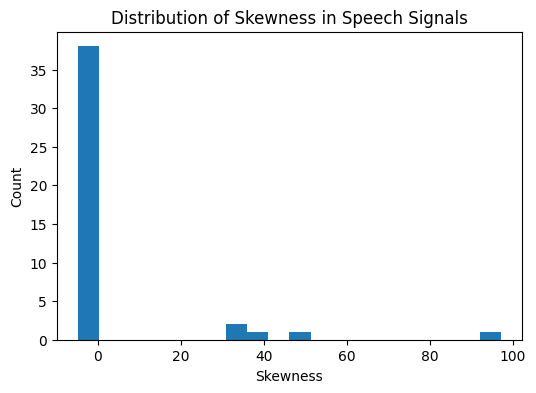

In [13]:
plt.figure(figsize=(6,4))
plt.hist(mfcc_summary_df['skewness'], bins=20)
plt.title("Distribution of Skewness in Speech Signals")
plt.xlabel("Skewness")
plt.ylabel("Count")
plt.show()


Entropy Analysis (Speech Complexity)

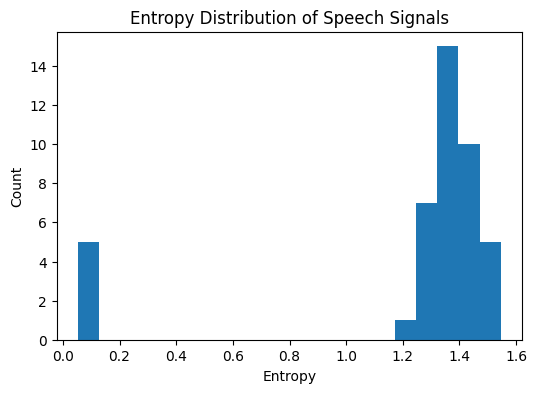

In [15]:
plt.figure(figsize=(6,4))
plt.hist(mfcc_summary_df['entropy'], bins=20)
plt.title("Entropy Distribution of Speech Signals")
plt.xlabel("Entropy")
plt.ylabel("Count")
plt.show()


**Correlation Heatmap (Feature Redundancy)**

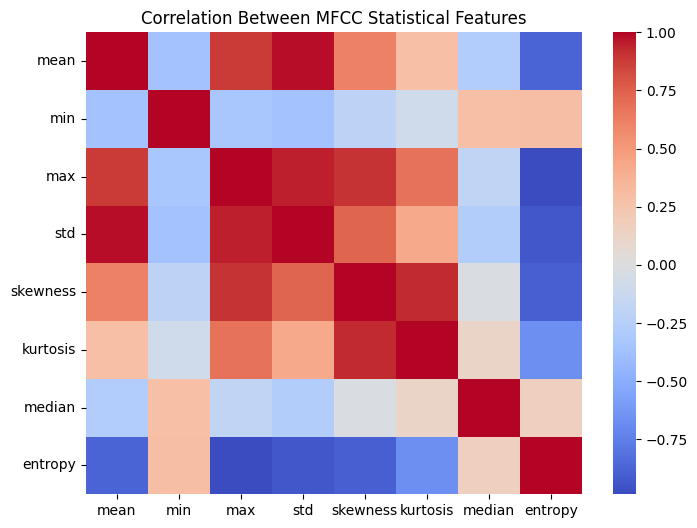

In [16]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(
    mfcc_summary_df.drop(columns=['Sample']).corr(),
    cmap='coolwarm'
)
plt.title("Correlation Between MFCC Statistical Features")
plt.show()


Outlier Identification (CRITICAL)

In [17]:
outliers = mfcc_summary_df[mfcc_summary_df['max'] > 1000]
outliers[['Sample', 'max', 'std', 'entropy']]


,Sample,max,std,entropy
17,s18,65535.0,1821.264047,0.060364
25,s26,65535.0,2027.754440,0.059909
26,s27,65535.0,675.179454,0.053456
28,s29,65535.0,1345.200696,0.055604
32,s33,65535.0,1663.909059,0.058180
